In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import plotly.graph_objects as go
import pickle
import tensorflow as tf

In [2]:
df = pd.read_csv('VG_sales_engineered.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Vicarious Visions,Visual Concepts,Volition Inc.,AO,E,E10+,K-A,M,RP,T
0,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,...,0,0,0,0,0,0,0,1,0,0
1,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,...,0,0,0,0,0,0,0,1,0,0
2,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.43,5.35,5.32,1.18,15.29,...,0,0,0,0,1,0,0,0,0,0
3,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,...,0,0,0,0,1,0,0,0,0,0
4,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,...,0,0,0,0,0,0,0,1,0,0


In [3]:
x = df[['Year_of_Release','Critic_Score','User_Score',
        '3DS','DC','DS','GBA','GC','PC','PS','PS2','PS3','PS4','PSP','PSV','Wii','WiiU','X360','XB','XOne',
        'Action','Adventure','Fighting','Misc','Platform.1','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy',
        'Activision','Atari','Bethesda Softworks','Capcom','Electronic Arts','Konami Digital Entertainment','LucasArts','Microsoft Game Studios','Midway Games',
        'Namco Bandai Games','Nintendo','Pub_other','Sega','Sony Computer Entertainment','Square Enix','SquareSoft','THQ','Take-Two Interactive','Ubisoft','Vivendi Games',
        'Warner Bros. Interactive Entertainment','Bethesda Game Studios','BioWare','Blizzard Entertainment','Capcom.1','Dev_other','EA Black Box','EA Canada','EA DICE',
        'EA Sports','EA Tiburon','Electronic Arts.1','HAL Labs','Harmonix Music Systems','Infinity Ward','Intelligent Systems','Konami','Level 5','Maxis','Midway','Namco',
        'Naughty Dog','Neversoft Entertainment','Nintendo.1','Polyphony Digital','Rockstar North','Rockstar San Diego','Rocksteady Studios','Sonic Team','Square Enix.1',
        'SquareSoft.1',"Traveller's Tales",'Treyarch','Turn 10','Ubisoft.1','Ubisoft Montreal','Valve Software','Vicarious Visions','Visual Concepts','Volition Inc.',
        'AO','E','E10+','K-A','M','RP','T']]

y = df['Global_Sales']

In [29]:
xtrain, xtest, ytrain, ytest = tts(x,y, test_size = 0.25, random_state=42)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
xtrain.shape

(5160, 99)

In [31]:
model  = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (xtrain.shape[1],)))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1))

In [63]:
model.compile(optimizer = 'adam', loss = 'mean_absolute_error')

In [65]:
model.fit(xtrain,ytrain, validation_data = (xtest,ytest), epochs = 36, batch_size = 112, verbose = 1)# ,callbacks = [EarlyStopping(patience = 3)], verbose = 1)

Epoch 1/36
47/47 [==============================] - 0s 3ms/step - loss: 0.4521 - val_loss: 0.5524
Epoch 2/36
47/47 [==============================] - 0s 3ms/step - loss: 0.4783 - val_loss: 0.4981
Epoch 3/36
47/47 [==============================] - 0s 2ms/step - loss: 0.4597 - val_loss: 0.5275
Epoch 4/36
47/47 [==============================] - 0s 2ms/step - loss: 0.4480 - val_loss: 0.4846
Epoch 5/36
47/47 [==============================] - 0s 2ms/step - loss: 0.4359 - val_loss: 0.4887
Epoch 6/36
47/47 [==============================] - 0s 2ms/step - loss: 0.4373 - val_loss: 0.5031
Epoch 7/36
47/47 [==============================] - 0s 2ms/step - loss: 0.4701 - val_loss: 0.5050
Epoch 8/36
47/47 [==============================] - 0s 2ms/step - loss: 0.4525 - val_loss: 0.4915
Epoch 9/36
47/47 [==============================] - 0s 2ms/step - loss: 0.4608 - val_loss: 0.5343
Epoch 10/36
47/47 [==============================] - 0s 2ms/step - loss: 0.4934 - val_loss: 0.5772
Epoch 11/36
47/47 [

In [66]:
pred = model.predict(xtest)

In [67]:
pred

array([[0.29120126],
       [0.20618168],
       [0.9730594 ],
       ...,
       [0.39343405],
       [0.4103923 ],
       [0.29598662]], dtype=float32)

In [68]:
mae = mean_absolute_error
mse = mean_squared_error

In [69]:
mae(ytest,pred)

0.491168890879779

In [70]:
mse(ytest,pred)

1.1173854644181478

In [71]:
pred = [i[0] for i in pred]
pred

[0.29120126,
 0.20618168,
 0.9730594,
 0.9542651,
 -0.031773686,
 0.288087,
 0.30195054,
 -0.080132484,
 0.36781323,
 0.3239191,
 0.41729677,
 0.76570255,
 0.41440076,
 0.23200577,
 0.53980535,
 0.33183733,
 4.832216,
 0.2888554,
 0.44047147,
 0.34220797,
 0.6195539,
 0.1479168,
 1.0103989,
 0.28468138,
 0.5905242,
 0.5983007,
 0.2778083,
 0.008618891,
 1.1726897,
 0.16578808,
 0.03679219,
 -0.01211974,
 0.6773276,
 0.9287832,
 0.38772202,
 0.32667628,
 0.25355494,
 0.37039113,
 0.4928919,
 -0.031226277,
 0.24695618,
 0.4103828,
 0.25157556,
 0.32542473,
 0.7535856,
 0.13842307,
 0.22866863,
 0.38765067,
 0.11651231,
 0.9381623,
 0.26170355,
 0.6087259,
 0.25117153,
 0.33357105,
 0.27739906,
 5.1725726,
 0.204491,
 1.1023912,
 0.2267642,
 0.36435828,
 0.066660106,
 0.47869158,
 0.672895,
 0.23538837,
 0.55319417,
 0.57012165,
 0.5551435,
 0.3790887,
 0.21240684,
 0.32675087,
 0.6758596,
 0.29971543,
 0.3126247,
 0.3336946,
 0.3822669,
 0.25572258,
 0.16643181,
 0.44763443,
 0.060205996

In [56]:
ytest

5728    0.07
5345    0.10
2906    0.39
3257    0.32
4607    0.15
        ... 
69      6.62
889     1.37
3226    0.32
5216    0.11
4556    0.16
Name: Global_Sales, Length: 1721, dtype: float64

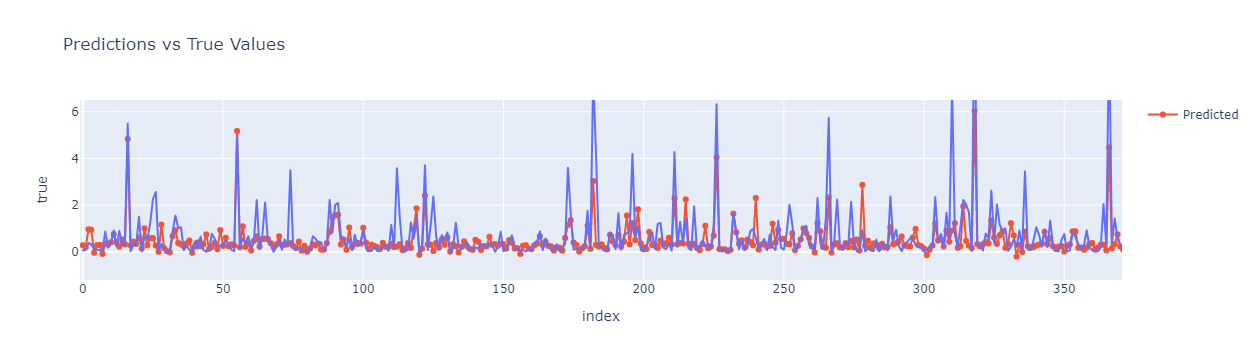

In [75]:
df2 = pd.DataFrame({'predicted':pred,'true': ytest })
df2 = df2.reset_index(drop = True)
fig = px.line(df2, x = df2.index, y = 'true', markers = False, title = 'Predictions vs True Values')
fig.add_scatter(x = df2.index,y = df2.predicted,
                    mode='markers+lines',
                name = 'Predicted'
                    )
fig.show()